# Health Insurance Claims Exploratory Data Analysis

In [26]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
# Load the dataset
insurance_csv = pd.read_csv("insurance.csv")

### 1. Data Validation and Cleaning
After reading the dataset into my environment, I like to profile the dataset to ensure it is complete and that the values are consistent with the variables I will examine downstream.

In [19]:
print(insurance_csv.head())
print(f"Rows: {insurance_csv.shape[0]}")
print(f"Columns: {insurance_csv.shape[1]}")

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Rows: 1338
Columns: 7


In [ ]:
insurance_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
insurance_csv.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


We can get a general idea of the composition of our dataset from the output above. Our dataset contains 1,338 entries and is absent of any NULL values. No conversion of datatypes is needed as all seem to be correct.

Next, I will check for duplicated entries and remove them if necessary.

In [11]:
duplicated = insurance_csv.duplicated()
print(f"Duplicated rows: {duplicated.sum()}")

Duplicated rows: 1


In [13]:
print(insurance_csv[duplicated])

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [16]:
insurance_csv = insurance_csv.drop_duplicates()
print(f"Rows after removing duplicates: {insurance_csv.shape[0]}")

Rows after removing duplicates: 1337


### 2. Identifying Relationships Between Variables
Now that we have verified that our dataset has the correct data types and that NULL and duplicate entries have been dealt with, we can move on to the exploratory data analysis (EDA).
To begin the EDA, we will look for trends or relationships between different variables within our dataset. Pairplots plot pairwise comparisons of each quantitative variable in our dataset, allowing us to easily visualize relationships between pairs.

<Figure size 1000x1000 with 0 Axes>

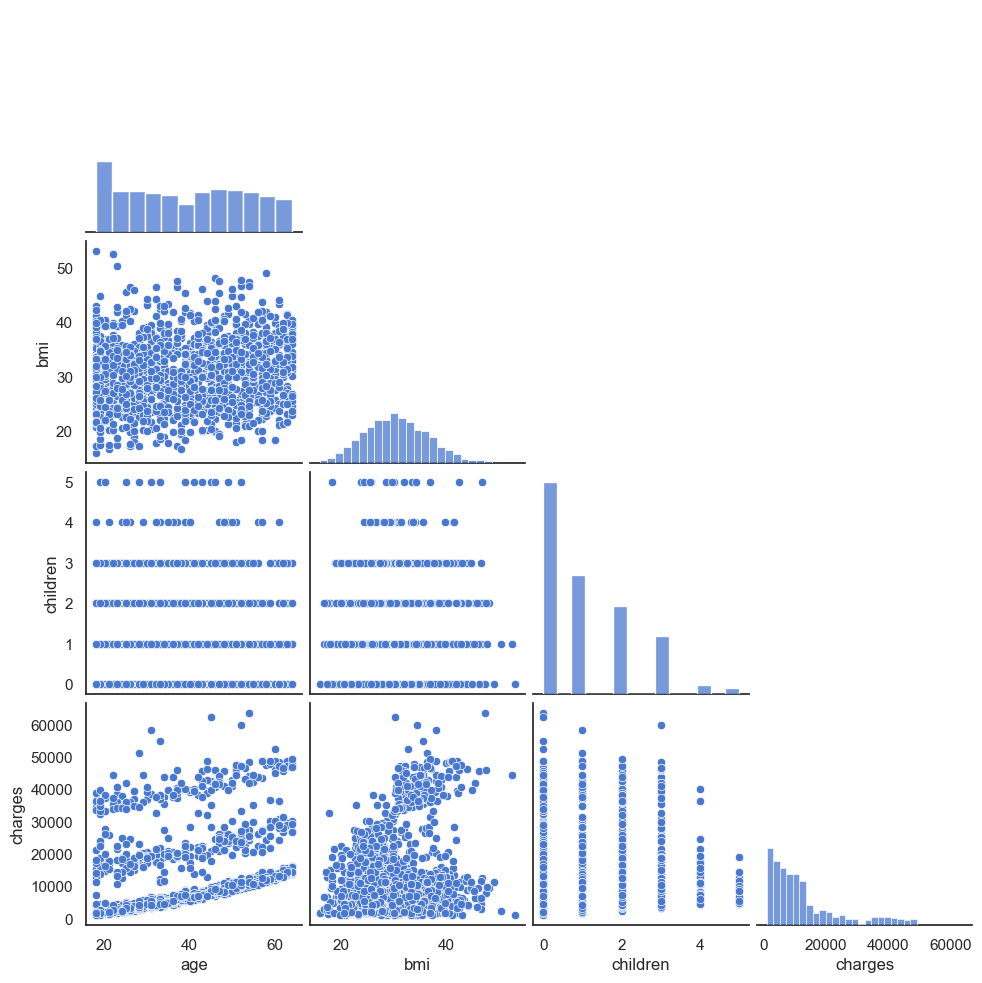

In [25]:
plt.figure(figsize=(10, 10))
sns.pairplot(insurance_csv, diag_kind='hist', corner=True)

Along the slope of the plot, we can see the distribution of each of our quantitative variables. 
- Age has a mostly uniform distribution, with a spike in the youngest bin (18-20 years).
- BMI has a normal distribution with a mean of 30.6.
- Children has a right-skewed distribution, with the average person within this dataset having 1 child.
- Charges, or insurance cost, also has a right-skewed distribution.

When examining the relationships between different variables, there seems to be a positive correlation between age and insurance cost.

R²: 0.089
p-value: 4.887e-29
Slope: 257.72
Intercept: $3165.89


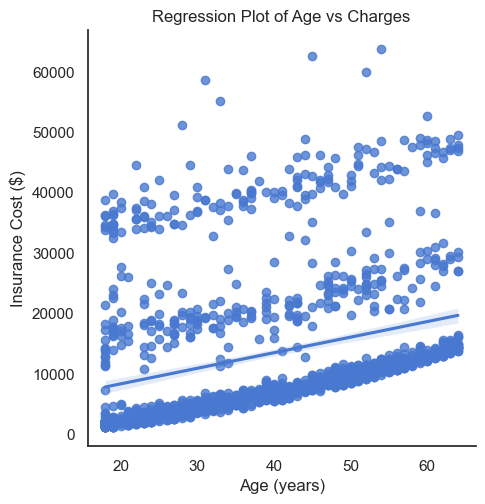

<Figure size 640x480 with 0 Axes>

In [49]:
# Linear Regression
age_model = LinearRegression()
age_model.fit(insurance_csv[['age']], insurance_csv['charges'])
age_slope = age_model.coef_[0]
age_intercept = age_model.intercept_
r_squared = age_model.score(insurance_csv[['age']], insurance_csv['charges'])
print(f"R²: {r_squared:.3f}")
print(f"p-value: {stats.linregress(insurance_csv['age'], insurance_csv['charges']).pvalue:.3e}")

print(f"Slope: {age_slope:.2f}")
print(f"Intercept: ${age_intercept:.2f}")

sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True)
plt.title('Regression Plot of Age vs Charges')
plt.xlabel('Age (years)')
plt.ylabel('Insurance Cost ($)')
plt.show()
plt.clf()

Above I plotted a linear regression to examine the relationship between the age of the insured and their insurance costs. While the p-value is essentially zero, showing that the relationship between age and insurance cost is statistically significant, the R^2^ value is only 8.9%, meaning that age *alone* is a weak predictor of insurance cost.

Next, let's look further into the age of the insured and see if other variables, such as gender, are distrubuted evenly.

<Figure size 1000x800 with 0 Axes>

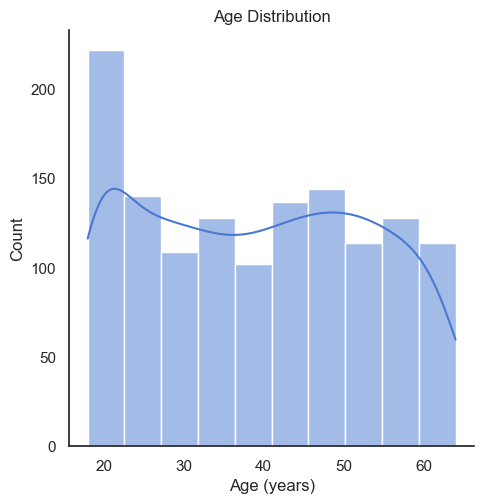

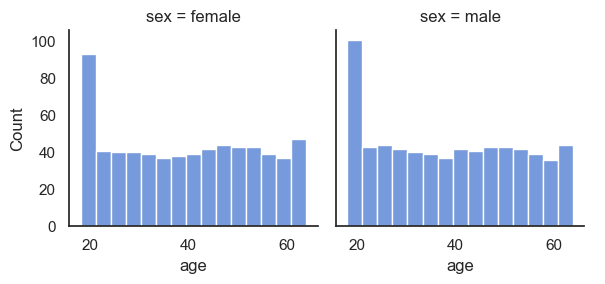

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize = (10, 8))
sns.set_theme(style="white", palette="muted", color_codes=True)
sns.displot(insurance_csv['age'], bins = 10, color = 'b', kde = True)
plt.title("Age Distribution")
plt.xlabel('Age (years)')
plt.ylabel('Count')

g = sns.FacetGrid(insurance_csv, col='sex')
g.map(sns.histplot, 'age', bins=15)
g.add_legend()
plt.show()
plt.clf()

Again, we can see that age has a mostly uniform distribution in our dataset, possible skewing ever so slightly towards the left. Additionally, we have an even distrubution of male to female entries.

Next, I will examine whether dividing the data by gender has an effect on the age/insurance cost relationship.

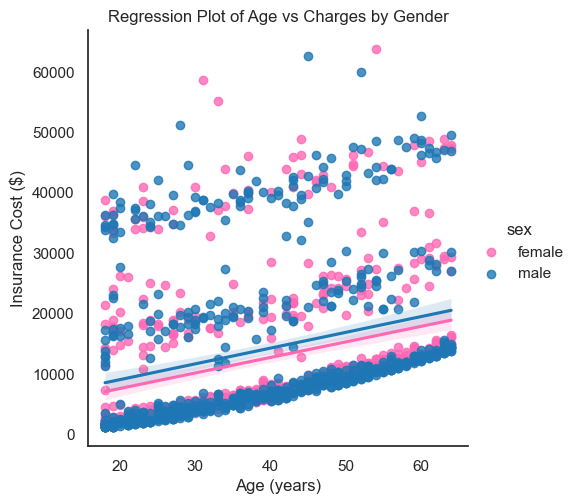

          Sex       Slope    Intercept        R²    p
0        Male  260.681339  3811.773852  0.079732  0.0
1      Female  257.011490  2416.848522  0.105349  0.0
2  Difference    3.669849  1394.925331       n/a  n/a


<Figure size 640x480 with 0 Axes>

In [63]:
# Separate data by sex
male_data = insurance_csv[insurance_csv['sex'] == 'male']
female_data = insurance_csv[insurance_csv['sex'] == 'female']

# Fit regression models
male_model = LinearRegression()
female_model = LinearRegression()

male_model.fit(male_data[['age']], male_data['charges'])
female_model.fit(female_data[['age']], female_data['charges'])

male_r_sq = male_model.score(male_data[['age']], male_data['charges'])
female_r_sq = female_model.score(female_data[['age']], female_data['charges'])

# Get slopes and y-intercepts
male_slope = male_model.coef_[0]
male_intercept = male_model.intercept_
female_slope = female_model.coef_[0]
female_intercept = female_model.intercept_

# Plot
sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='sex', palette={'male': '#1f77b4', 'female': '#ff69b4'})
plt.title('Regression Plot of Age vs Charges by Gender')
plt.xlabel('Age (years)')
plt.ylabel('Insurance Cost ($)')
plt.show()
plt.clf()

results = pd.DataFrame({
    'Sex': ['Male', 'Female', 'Difference'],
    'Slope': [male_slope, female_slope, (abs(male_slope - female_slope))],
    'Intercept': [male_intercept, female_intercept, (abs(male_intercept - female_intercept))],
    'R²': [male_r_sq, female_r_sq, 'n/a'],
    'p': [(stats.linregress(male_data['age'], male_data['charges']).pvalue), (stats.linregress(female_data['age'], female_data['charges']).pvalue), 'n/a']
})          

print(results)

When we plot the linear regression of insurance costs by age for male and female clients, we can see that the differences in cost are minimal. The slope of both male and female regressions are essentially the same, showing that age does not impact costs of one gender more than the other. Additionally, the R^2^ values for male and female clients are 7.9% and 10.5%, respectively. This shows that age is a weak predictor of insurance costs for male and female clients.

<Figure size 1000x800 with 0 Axes>

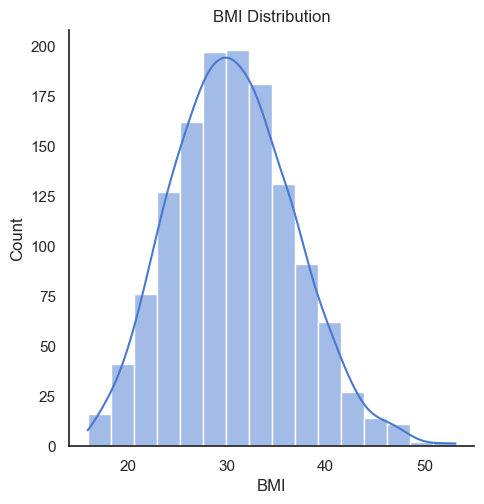

<Figure size 640x480 with 0 Axes>

In [54]:
plt.figure(figsize = (10, 8))
sns.set_theme(style="white", palette="muted", color_codes=True)
sns.displot(insurance_csv['bmi'], bins = 16, color = 'b', kde = True)
plt.title("BMI Distribution")
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()
plt.clf()

<Figure size 1000x800 with 0 Axes>

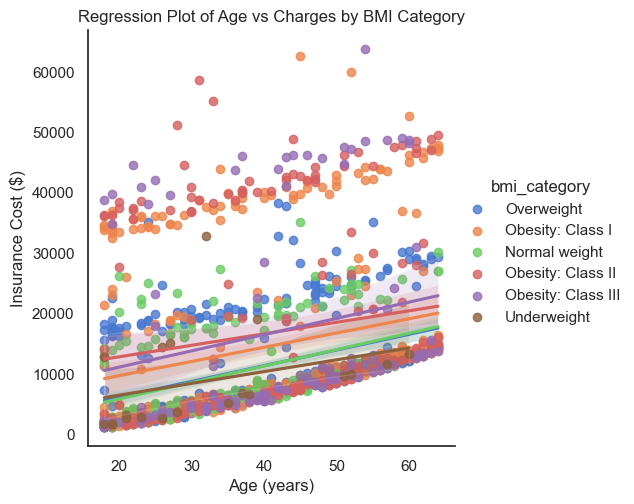

         BMI Category       Slope    Intercept        R²             p
0         Underweight  195.222558  2536.750834  0.115750  1.421732e-01
1       Normal weight  272.322987   372.243292  0.245699  3.623433e-15
2          Overweight  259.930961   921.299282  0.189524  9.963691e-19
3    Obesity: Class I  235.823633  4946.299100  0.063145  5.500593e-07
4   Obesity: Class II  190.478524  8982.762788  0.034271  5.663254e-03
5  Obesity: Class III  269.042829  5699.844713  0.051332  1.581633e-02


<Figure size 640x480 with 0 Axes>

In [62]:
bmi_categories = ['Underweight', 'Normal weight', 'Overweight', 'Obesity: Class I', 'Obesity: Class II', 'Obesity: Class III']
bmi_category = []
for i in insurance_csv['bmi']:
    if i < 18.5:
        bmi_category.append('Underweight')
    elif 18.5 <= i < 24.9:
        bmi_category.append('Normal weight')
    elif 25 <= i < 29.9:
        bmi_category.append('Overweight')
    elif 30 <= i < 34.9:
        bmi_category.append('Obesity: Class I')
    elif 35 <= i < 39.9:
        bmi_category.append('Obesity: Class II')
    else:
        bmi_category.append('Obesity: Class III')
insurance_csv['bmi_category'] = bmi_category

results = []
for category in bmi_categories:
    data = insurance_csv[insurance_csv['bmi_category'] == category]
    if len(data) > 0:
        model = LinearRegression()
        model.fit(data[['age']], data['charges'])
        r_sq = model.score(data[['age']], data['charges'])
        slope = model.coef_[0]
        intercept = model.intercept_
        p_value = stats.linregress(data['age'], data['charges']).pvalue
        results.append({
            'BMI Category': category,
            'Slope': slope,
            'Intercept': intercept,
            'R²': r_sq,
            'p': p_value
        })

bmi_df = pd.DataFrame(results)

plt.figure(figsize=(10, 8))
sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='bmi_category')
plt.title('Regression Plot of Age vs Charges by BMI Category')
plt.xlabel('Age (years)')
plt.ylabel('Insurance Cost ($)')
plt.show()
plt.clf()

print(bmi_df)

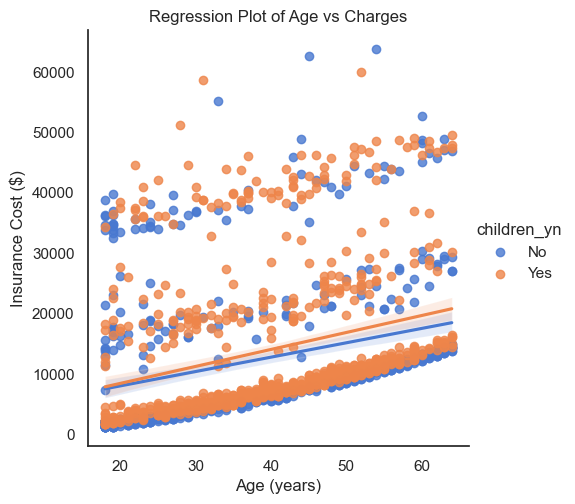

<Figure size 640x480 with 0 Axes>

In [47]:
insurance_csv['children_yn'] = insurance_csv['children'].apply(lambda x: 'Yes' if x >= 1 else 'No')

sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='children_yn')
plt.title('Regression Plot of Age vs Charges')
plt.xlabel('Age (years)')
plt.ylabel('Insurance Cost ($)')
plt.show()
plt.clf()